<a href="https://colab.research.google.com/github/Ella0803/ml_finance_imperial/blob/main/Programming_Sessions/Programming_Session_2/Programming_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 2 - Credit Risk Prediction </center>


# Data Analysis and Model Fine-tuning Tutorial

## Outline

- [Exploring the dataset](#Exploring-the-dataset)
  - [Loading the dataset](#Loading-the-dataset)
  - [Adding a new categorical feature](#Adding-a-new-categorical-feature)
- [Visualization](#Visualization)
  - [Count plot for a categorical variable](#Count-plot-for-a-categorical-variable)
  - [Numerical variable distribution](#Numerical-variable-distribution)
  - [Boxplots](#Boxplots)
- [Preprocessing the data](#Preprocessing-the-data)
  - [Preprocessing categorical variables](#Preprocessing-categorical-variables)
  - [Preprocessing numerical variables](#Preprocessing-numerical-variables)
- [Finetuning a Supervised Model](#Finetuning-a-Supervised-Model)
  - [Evaluation Metrics](#Evaluation-Metrics)
  - [Fine Tuning Random Forest](#Fine-Tuning-Random-Forest)
- [Adjusting the threshold](#Adjusting-the-threshold)
  - [A small review](#A-small-review)
  - [Adjusting the probability threshold](#Adjusting-the-probability-threshold)

## Introduction

Welcome to this comprehensive data analysis and model fine-tuning tutorial. Our journey will explore various aspects of handling, analyzing, and making predictions from complex datasets.

## Challenge

The primary challenge we face is optimizing model performance for classification problems, particularly in contexts with imbalanced datasets, such as fraud detection or disease prediction.

## DataSet Overview

We will be working with a dataset that, while synthetic, closely resembles real-world data in structure and complexity. It includes both numerical and categorical features, presenting a common scenario in data analysis and machine learning tasks.
This dataset comprises records of individuals who have obtained loans from a bank.

- **Target Variable:** `loan_status` (0 or 1)
  - `1` for default cases.
  - `0` for non-default cases.
- The problem is framed as a **binary classification problem**.

Note: The dataset presents a considerable imbalance.

The goal is to predict the binary target, `loan_status`, using the following features:
- **person_age** (Numerical): Age of the borrower.
- **person_income** (Numerical): Annual income of the borrower.
- **person_home_ownership** (Categorical): Home ownership status of the borrower, with categories 'MORTGAGE', 'RENT', 'OWN', 'OTHER'.
- **person_emp_length** (Numerical): Length of employment in years.
- **loan_intent** (Categorical): Purpose of the loan, with categories 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'EDUCATION', 'PERSONAL'.
- **loan_grade** (Categorical): Loan grade, with categories 'A', 'C', 'D', 'B', 'E', 'F', 'G'.
- **loan_amnt** (Numerical): Amount of the loan.
- **loan_int_rate** (Numerical): Interest rate of the loan.
- **loan_percent_income** (Numerical): The loan amount as a percentage of the borrower's income.
- **cb_person_default_on_file** (Categorical): Indicates whether there is a historical default ('N' for no, 'Y' for yes).
- **cb_person_cred_hist_length** (Numerical): Length of the borrower's credit history.

## Objectives

Our main goals in this tutorial are to:
1. Explore and understand the dataset through loading and visualization techniques.
2. Implement preprocessing steps for both categorical and numerical data to prepare it for modeling.
3. Fine-tune a supervised machine learning model, specifically a Random Forest classifier, to better predict outcomes.
4. Learn how to adjust the decision threshold of our model to reflect the priorities and needs of specific business outcomes or research questions.


# 1. Exploring the dataset

---
<font color=green>Q1:</font>
<br><font color='green'>
Import the fundamental libraries that provide the necessary tools for data manipulation, visualization, and modeling.
</font>

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<font color=green>Q2:</font>
<br><font color='green'>
Load the dataset directly into pandas using the command `pd.read_csv(<paste_the_raw_url_here>, index_col=0)`. Obtain the 'url' by navigating to the GitHub page of the dataset, clicking on the file, and then clicking on "Raw" to access the raw URL.
</font>

---

In [27]:
url = 'https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/refs/heads/main/Programming_Sessions/Programming_Session_2/credit_dataset.csv'
df = pd.read_csv(url, index_col=0)

In [28]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,65000,RENT,8.0,VENTURE,E,15000,16.32,1,0.23,Y,4
1,27,72000,RENT,3.0,DEBTCONSOLIDATION,D,25000,15.95,1,0.35,Y,6
2,21,28800,MORTGAGE,0.0,DEBTCONSOLIDATION,A,5000,7.49,0,0.17,N,3
3,30,90000,RENT,14.0,PERSONAL,D,10000,15.62,0,0.11,Y,6
4,30,61000,MORTGAGE,4.0,PERSONAL,A,4500,6.54,0,0.07,N,6


---
<font color=green>Q3:</font>
<br><font color='green'>
Randomize the order of the dataset's rows.
</font>

---

In [32]:
df = df.sample(frac=1, random_state=42).reset_index(drop = True)
#frac=1 all the lines
#drop=True 去掉原本的index

---
<font color=green>Q4:</font>
<br><font color='green'>
Display the first and last 5 rows of the `df` dataset.

</font>

---

In [35]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,30000,RENT,3.0,MEDICAL,D,5300,15.28,1,0.18,Y,3
1,29,142000,OWN,14.0,PERSONAL,B,24250,11.48,0,0.17,N,8
2,37,86500,MORTGAGE,13.0,EDUCATION,A,6500,7.14,0,0.08,N,13
3,23,55000,OWN,6.0,MEDICAL,C,18500,13.16,0,0.34,N,4
4,23,36000,OWN,4.0,VENTURE,A,18000,7.88,0,0.50,N,2


In [36]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,40,165000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,9000,7.51,0,0.05,N,16
32577,26,32500,MORTGAGE,0.0,HOMEIMPROVEMENT,A,3500,8.59,0,0.11,N,2
32578,26,85000,MORTGAGE,10.0,VENTURE,C,2200,13.43,0,0.03,N,3
32579,26,30000,RENT,2.0,MEDICAL,A,6000,6.54,0,0.20,N,2
32580,37,30480,OWN,1.0,MEDICAL,B,1200,11.99,0,0.04,N,15


---
<font color=green>Q5:</font>
<br><font color='green'>
Use `df.info()` to determine the dataset's total number of rows and check for the presence of missing values.
</font>

---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 14668 to 23654
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


---
<font color=green>Q6:</font>
<br><font color='green'>
Create two lists: `catvars` for the categorical variables named  and `numvars` for numerical variables. Then, delete 'loan_status' from `numvars` the labels.
</font>

---

In [41]:
catvars = list(df.select_dtypes(include = 'object').columns)

In [42]:
numvars = list(df.select_dtypes(exclude = 'object').columns)

In [43]:
print(catvars)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [45]:
numvars.remove('loan_status')

In [46]:
print(numvars)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


---
<font color=green>Q7:</font>
<br><font color='green'>
Split the dataset into a training set,  `df_train`, comprising 70% of the data, and a test set, `df_test`, containing the remaining 30% as described in the figure below.

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1ZbYtw7eU6KdGkIhLUfwsYFZWPMg61jer"></center>

In [48]:
df.shape

(32581, 12)

In [50]:
int(0.7*df.shape[0])

22806

In [47]:
df.loc[10:] #从第十行开始

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10,23,110000,MORTGAGE,8.0,VENTURE,A,7800,10.99,0,0.07,N,4
11,22,35400,OWN,6.0,EDUCATION,A,8000,6.03,0,0.23,N,2
12,32,63000,RENT,11.0,EDUCATION,A,14000,6.91,0,0.22,N,5
13,46,56000,MORTGAGE,1.0,MEDICAL,A,6000,10.99,0,0.11,N,13
14,23,76500,RENT,3.0,DEBTCONSOLIDATION,B,18000,10.65,1,0.24,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,165000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,9000,7.51,0,0.05,N,16
32577,26,32500,MORTGAGE,0.0,HOMEIMPROVEMENT,A,3500,8.59,0,0.11,N,2
32578,26,85000,MORTGAGE,10.0,VENTURE,C,2200,13.43,0,0.03,N,3
32579,26,30000,RENT,2.0,MEDICAL,A,6000,6.54,0,0.20,N,2


In [51]:
df_train = df.loc[:int(0.7*df.shape[0])-1] #因为overlap所以-1
df_test = df.loc[int(0.7*df.shape[0]):]

In [52]:
df_train.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22801,54,107000,RENT,27.0,VENTURE,B,10000,9.91,0,0.09,N,20
22802,21,56000,RENT,4.0,VENTURE,E,20000,17.39,1,0.36,Y,3
22803,27,27000,RENT,3.0,MEDICAL,B,6900,9.99,0,0.26,N,7
22804,22,34000,RENT,3.0,DEBTCONSOLIDATION,A,5000,8.00,0,0.15,N,4
22805,31,85000,RENT,1.0,MEDICAL,A,18500,7.51,1,0.18,N,7


In [53]:
df_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22806,26,55000,RENT,2.0,EDUCATION,B,14000,9.99,0,0.25,N,4
22807,23,33195,RENT,5.0,EDUCATION,B,1800,11.99,0,0.05,N,4
22808,30,150000,RENT,2.0,VENTURE,B,21000,12.62,0,0.14,N,9
22809,31,151000,MORTGAGE,1.0,EDUCATION,C,21000,11.97,0,0.14,N,8
22810,25,38000,MORTGAGE,4.0,PERSONAL,A,6000,5.42,0,0.16,N,2


### 1.2 Adding a new categorical feature

In [54]:
print(df_train.shape)
print(df_test.shape)

(22806, 12)
(9775, 12)


---
<font color=green>Q8:</font>
<br><font color='green'>
Display the sub-training dataframe that contains the numerical variables.
</font>

---

In [55]:
df_train[numvars]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,24,30000,3.0,5300,15.28,0.18,3
1,29,142000,14.0,24250,11.48,0.17,8
2,37,86500,13.0,6500,7.14,0.08,13
3,23,55000,6.0,18500,13.16,0.34,4
4,23,36000,4.0,18000,7.88,0.50,2
...,...,...,...,...,...,...,...
22801,54,107000,27.0,10000,9.91,0.09,20
22802,21,56000,4.0,20000,17.39,0.36,3
22803,27,27000,3.0,6900,9.99,0.26,7
22804,22,34000,3.0,5000,8.00,0.15,4


---
<font color=green>Q9:</font>
<br><font color='green'>
Employ `df.describe()` to analyze the distribution characteristics of the numerical features of the dataset.
</font>

---

In [56]:
df_train[numvars].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22806.000000,2.280600e+04,22806.000000,22806.000000,22806.000000,22806.000000,22806.000000
mean,27.726388,6.658350e+04,4.778699,9616.910024,10.998121,0.169905,5.815093
std,6.375465,6.732116e+04,3.995053,6366.829258,3.094361,0.106925,4.066609
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.504400e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.985900e+04,7.000000,12250.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


count    2.280700e+04
mean     6.573199e+04
std      5.190809e+04
min      4.000000e+03
25%      3.864750e+04
50%      5.500000e+04
75%      7.850850e+04
max      2.039784e+06
Name: person_income, dtype: float64

---
<font color=green>Q10:</font>
<br><font color='green'>
Create a new categorical feature `category_income` based on person_income values, categorized into 'A', 'B', 'C', or 'D' according to specified income ranges:
  * If `person_income` is in [0, 39000], then `category_income = 'D'`.
  * If `person_income` is in [39000, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79000], then `category_income = 'B'`.
  * If `person_income` is in [79000, +$\infty$], then `category_income = 'A'`.

  Use the function `np.select(conditions, labels, default='E')` and define the `conditions` list and corresponding `labels`, then apply `np.select()` to generate the `category_income` column in your DataFrame.
</font>

---

In [57]:
conditions = [
    (df['person_income'] <= 39000),
    (df['person_income'] > 39000) & (df['person_income'] <= 55000),
    (df['person_income'] > 55000) & (df['person_income'] <= 79000),
    (df['person_income'] > 79000)
]
labels = ['D', 'C', 'B', 'A']

df['category_income'] = np.select(conditions, labels, default='E')

In [58]:
df.category_income.unique()

array(['D', 'A', 'C', 'B'], dtype=object)

In [73]:
df_train = df.loc[:int(0.7*df.shape[0])-1]
df_test = df.loc[int(0.7*df.shape[0]):]

---
<font color=green>Q11:</font>
<br><font color='green'>
Include the newly created `category_income` feature in the `catvars` list, which holds categorical variables.
</font>

---

In [74]:
catvars.append('category_income')

In [75]:
print(catvars)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'category_income', 'category_income', 'category_income']


# 2. Visualization

### 2.1 Count plot for a categorical variable.

A **count plot** is essentially a histogram for categorical variables, displaying the number of observations within each category through bars.


---
<font color=green>Q12:</font>
<br><font color='green'>
To visualize the distribution of the `'person_home_ownership'` variable with counts separated by target values (0 or 1), utilize `seaborn.countplot` and specify the hue parameter for the target variable differentiation.
</font>

---

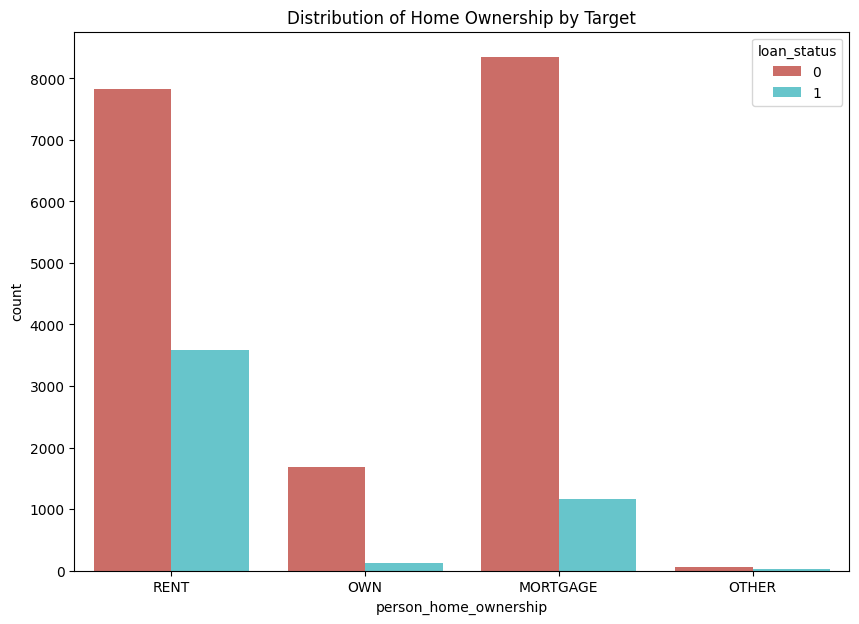

In [61]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_train, x='person_home_ownership', hue='loan_status', palette = 'hls')
plt.title('Distribution of Home Ownership by Target')
plt.show()


### 2.2 Numerical variable distribution

To plot the univariate distribution of a numerical variable for two groups corresponding to "0" and "1" targets, we consider using separate distribution plots for each target value.

---
<font color=green>Q13:</font>
<br><font color='green'>
To display the distribution of the `person_income` variable for "0" and "1" targets, use `seaborn.displot` for each target group separately, ensuring clear differentiation between them.
</font>

---

<Figure size 1000x700 with 0 Axes>

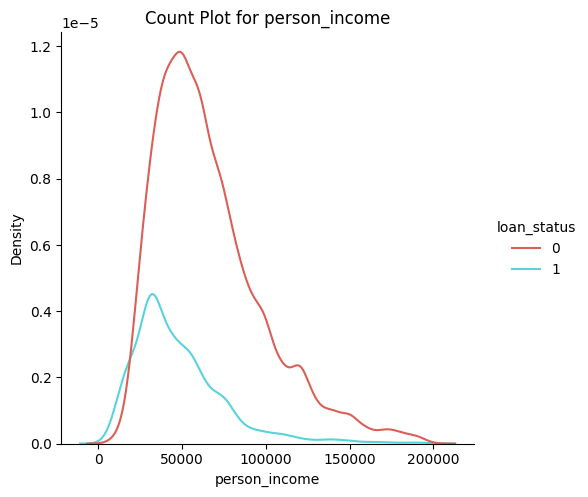

In [65]:
df_plot = df_train[df_train['person_income'] < 200000]

plt.figure(figsize = (10, 7))
sns.displot(data=df_plot, x='person_income', hue='loan_status', palette='hls', kind = 'kde')
plt.title('Count Plot for person_income')
plt.show()

<Figure size 1000x700 with 0 Axes>

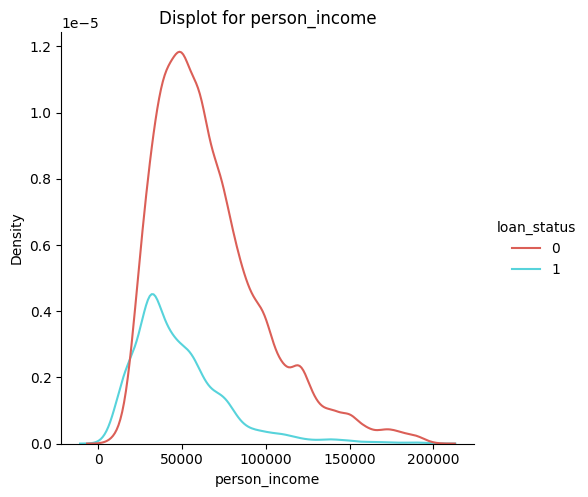

---
<font color=green>Q14:</font>
<br><font color='green'>
How do these distributions compare in terms of their characteristics and differences?
</font>

---

---

---

### 2.3 Boxplots

To illustrate the distribution of a numerical variable across different categories, we employ box plots. Box plots visualize data distributions through a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Here's a breakdown of these components:

- **Median (Q2/50th Percentile):** The central value in the dataset.
- **First Quartile (Q1/25th Percentile):** The median between the smallest value (excluding the "minimum") and the dataset's median.
- **Third Quartile (Q3/75th Percentile):** The median between the dataset's median and its highest value (excluding the "maximum").
- **Interquartile Range (IQR):** The range between the 25th and 75th percentiles.
- **Whiskers:** Indicate the spread of the data outside the middle 50% (IQR).
- **Outliers:** Data points that fall outside the range defined by the whiskers, typically represented as individual points.
- **Maximum:** The upper boundary for data considered non-outliers, calculated as Q3 + 1.5*IQR.
- **Minimum:** The lower boundary for data considered non-outliers, calculated as Q1 - 1.5*IQR.

Box plots provide a concise overview of the distribution's spread, central tendency, and potential outliers, facilitating comparisons across different categories.


<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1g3G3I6msJQ4iNXUUr_Z5cZAji14Dj5lk"></center>


---
<font color=green>Q15:</font>
<br><font color='green'>
Using `seaborn.boxplot`, describe the distribution of the numerical feature `loan_amnt` according to the new categorical variable `category_income` and the targets `loan_status`.
</font>

---

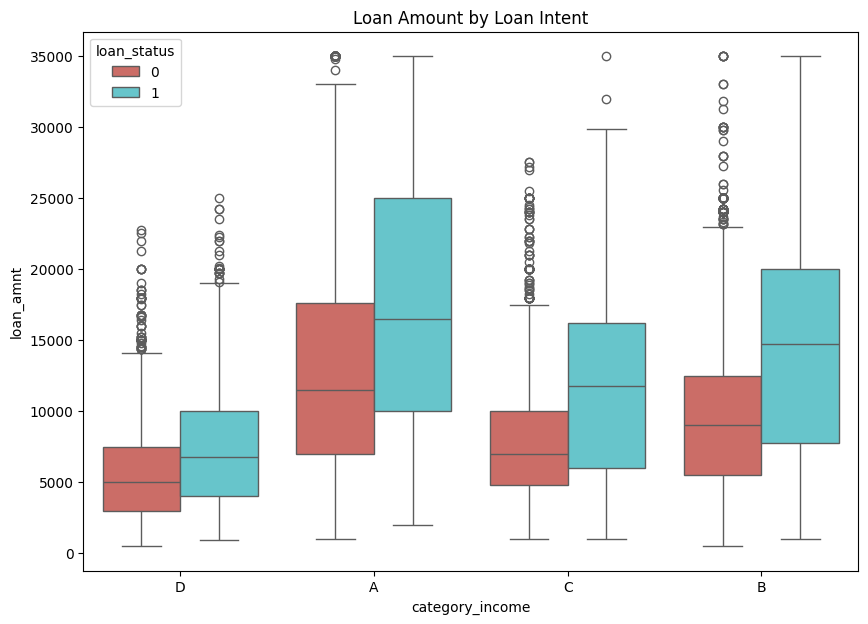

In [76]:
plt.figure(figsize = (10, 7))
sns.boxplot(data=df_train, x='category_income', y='loan_amnt', hue='loan_status', palette='hls')
plt.title('Loan Amount by Loan Intent')
plt.show()

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables

Assume there is a categorical variable X that can adopt K distinct values, denoted as $\{1, \dots, K\}$.

- **One-hot encoding** of a category involves converting the category into a vector in $\mathbb{R}^K$, where the vector contains a 1 in the position corresponding to the category and 0s elsewhere.

- For example, with $K=4$, the category represented by "3" in a sample would be one-hot encoded as the vector $[0, 0, 1, 0]$.

- This process allows a single categorical feature to be transformed into K binary features.

- **Considerations**:
  - **Dimensionality**: One-hot encoding can significantly increase the feature space with high-cardinality variables, potentially leading to sparse matrices and increased computational complexity.
  - **Alternative Methods**: Depending on context, alternatives like label encoding or embeddings may be more efficient, especially in handling categories with many levels.
  - **Dummy Variable Trap**: Given that each sample corresponds to only one category, these K binary features are not entirely independent; the value of the K-th feature can be inferred from the preceding K-1 features. Thus, it's common practice to omit one of the columns to avoid multicollinearity.




<center><img width="800" src = "https://drive.google.com/uc?export=view&id=1-WOjGo6OFQ0Cuq4mAmZ8oh6T2D6Y1gVL"></center>

---
<font color=green>Q16:</font>
<br><font color='green'>
For every categorical variable, list the names of its categories along with their respective counts.
</font>

---

The categories:

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'category_income']


In [77]:
for feature in catvars:
    print(f'Feature: {feature}... Categories: {df_train[feature].unique()}.. Count:{df_train[feature].nunique()}')

Feature: person_home_ownership... Categories: ['RENT' 'OWN' 'MORTGAGE' 'OTHER'].. Count:4
Feature: loan_intent... Categories: ['MEDICAL' 'PERSONAL' 'EDUCATION' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT'].. Count:6
Feature: loan_grade... Categories: ['D' 'B' 'A' 'C' 'E' 'F' 'G'].. Count:7
Feature: cb_person_default_on_file... Categories: ['Y' 'N'].. Count:2
Feature: category_income... Categories: ['D' 'A' 'C' 'B'].. Count:4
Feature: category_income... Categories: ['D' 'A' 'C' 'B'].. Count:4
Feature: category_income... Categories: ['D' 'A' 'C' 'B'].. Count:4


The number of categories:

In [78]:
for feature in catvars:
    print('Feature: {} Categories: {} '.format(feature, df_train[feature].unique()))

Feature: person_home_ownership Categories: ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 
Feature: loan_intent Categories: ['MEDICAL' 'PERSONAL' 'EDUCATION' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT'] 
Feature: loan_grade Categories: ['D' 'B' 'A' 'C' 'E' 'F' 'G'] 
Feature: cb_person_default_on_file Categories: ['Y' 'N'] 
Feature: category_income Categories: ['D' 'A' 'C' 'B'] 
Feature: category_income Categories: ['D' 'A' 'C' 'B'] 
Feature: category_income Categories: ['D' 'A' 'C' 'B'] 


---
<font color=green>Q17:</font>
<br><font color='green'>
Determine the count of unique values for each categorical variable.
</font>

---

In [79]:
df[catvars].nunique()

,0
person_home_ownership,4
loan_intent,6
loan_grade,7
cb_person_default_on_file,2
category_income,4
category_income,4
category_income,4


---
<font color=green>Q18:</font>
<br><font color='green'>
Print the shape of `df_train` prior to applying One Hot Encoding.
</font>

---

In [80]:
print(df_train.shape)

(22806, 13)


---
<font color=green>Q19:</font>
<br><font color='green'>
Transform each categorical variable, which has K categories, into K-1 new feature columns by employing either `pandas.get_dummies` or `sklearn.preprocessing.OneHotEncoder`, ensuring to drop one category to avoid multicollinearity.
</font>

---

In [81]:
df_train_one_hot = pd.get_dummies(df_train,
                                  columns=catvars,
                                  drop_first=True)

In [82]:
df_test_one_hot = pd.get_dummies(df_test,
                                  columns=catvars,
                                  drop_first=True)

In [83]:
print(df_train_one_hot.shape)

(22806, 32)


In [84]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income',
 'category_income',
 'category_income']

---
<font color=green>Q20:</font>
<br><font color='green'>
Describe how the shape of `df_train` is altered following the application of One Hot Encoding.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1eEOIb904c2UOT82AUYdjaZINj9rVr1Ji"></center>

(22807, 26)

### 3.2 Preprocessing Numerical Variables

---
<font color=green>Q21:</font>
<br><font color='green'>
Divide `df_train` into feature and target subsets named `df_train_features` and `df_train_targets`, respectively, and similarly split `df_test` into `df_test_features` and `df_test_targets` as illustrated in the provided diagram.

</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1V0Sjgbbef6mdNSAwKAUQLeJlOWJU-3np"></center>

In [86]:
df_train_targets = df_train_one_hot['loan_status']
df_train_features = df_train_one_hot.drop('loan_status', axis=1)

In [87]:
df_test_targets = df_test_one_hot['loan_status']
df_test_features = df_test_one_hot.drop('loan_status', axis=1)

In [88]:
df_test_features.shape

(9775, 31)

---
<font color=green>Q22:</font>
<br><font color='green'>
Divide each of `df_train_features` and `df_test_features` as shown in the diagram below:

* `df_train_features_numvars` and `df_test_features_numvars` containing the training abd testing numerical features
* `df_train_features_rest` and `df_test_features_rest` containing the rest of the features.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1loF_Uk967CSVlGKikXWbDxwpKAEGaDlg"></center>

In [91]:
df_train_features_numvars = df_train_features[numvars]
df_test_features_numvars = df_test_features[numvars]

In [92]:
df_train_features_rest = df_train_features.drop(numvars, axis=1)
df_test_features_rest = df_test_features.drop(numvars, axis=1)

---
<font color=green>Q23:</font>
<br><font color='green'>
Generate histograms for the numerical variables in `df_train_features_numvars`  by uzing the `hist()` method from the DataFrame Class.
</font>

---

<Figure size 640x480 with 0 Axes>

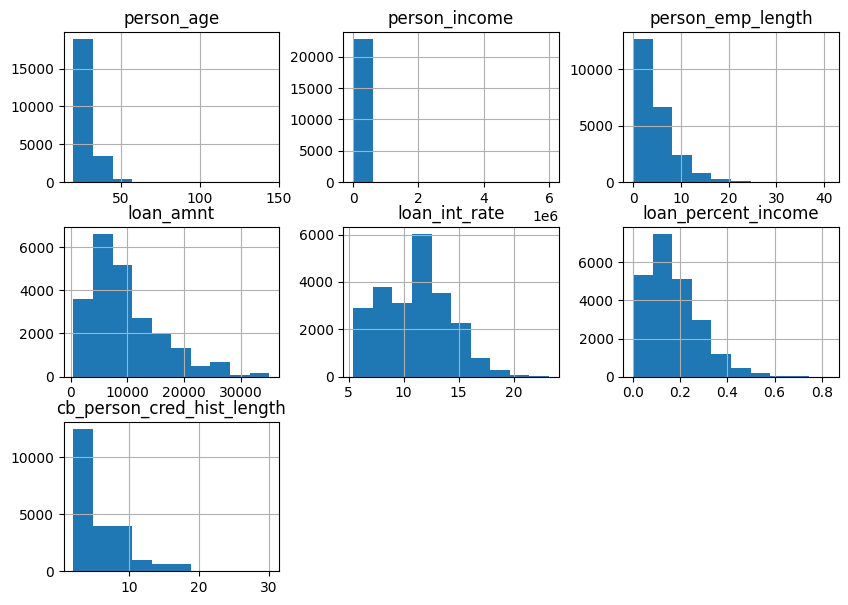

In [94]:
plt.figure()
df_train_features_numvars.hist(figsize=(10, 7))
plt.show()

There are two common approaches of scaling a numerical variable:

1. **Normalization (Min-Max Scaling):** This approach rescales a feature to a specific range, typically 0 to 1. It is done by subtracting the minimum value of the feature from each value and then dividing by the range (the maximum value minus the minimum value). Normalization is particularly useful when you need to ensure that the variables are bounded within a specific range.

2. **Standardization (Z-score Normalization):** This method involves removing the mean from each feature value and then dividing by the standard deviation, resulting in features that have a mean of 0 and a standard deviation of 1. Standardization is beneficial when the features should have the properties of a standard normal distribution, which can be advantageous for certain algorithms.


<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1UiUAyNligNF9TQkavRdatKR-4WI3pxqz"></center>

---
<font color=green>Q24:</font>
<br><font color='green'>
From `sklearn.preprocessing`, scale the numerical features using one of the two scaling methods:
  * `StandardScaler()` to achieve a distribution with a mean of 0 and a standard deviation of 1.
  * `MinMaxScaler()` to scale the data into the [0, 1] range.
</font>

---

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df_train_features_numvars_std = pd.DataFrame(standard_scaler.fit_transform(df_train_features_numvars))
df_train_features_numvars_min_max = pd.DataFrame(min_max_scaler.fit_transform(df_train_features_numvars))

In [97]:
df_train_features_numvars_std

,0,1,2,3,4,5,6
0,-0.584502,-0.543430,-0.445235,-0.678046,1.383799,0.094411,-0.692261
1,0.199772,1.120274,2.308230,2.298383,0.155732,0.000886,0.537292
2,1.454610,0.295850,2.057915,-0.489565,-1.246851,-0.840841,1.766845
3,-0.741356,-0.172067,0.305710,1.395245,0.698667,1.590813,-0.446350
4,-0.741356,-0.454303,-0.194920,1.316711,-1.007701,3.087216,-0.938171
...,...,...,...,...,...,...,...
22801,4.121141,0.600367,5.562326,0.060171,-0.351654,-0.747315,3.488218
22802,-1.055066,-0.157213,-0.194920,1.630846,2.065700,1.777864,-0.692261
22803,-0.113937,-0.587993,-0.445235,-0.426738,-0.325800,0.842612,0.291381
22804,-0.898211,-0.484012,-0.445235,-0.725166,-0.968920,-0.186164,-0.446350


<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1b2nPF0z0eMVwvH3g5Yu40AtKaQHFlMUa"></center>

---
<font color=green>Q25:</font>
<br><font color='green'>
Display the histograms of the numerical features after the scaling process.
</font>

---

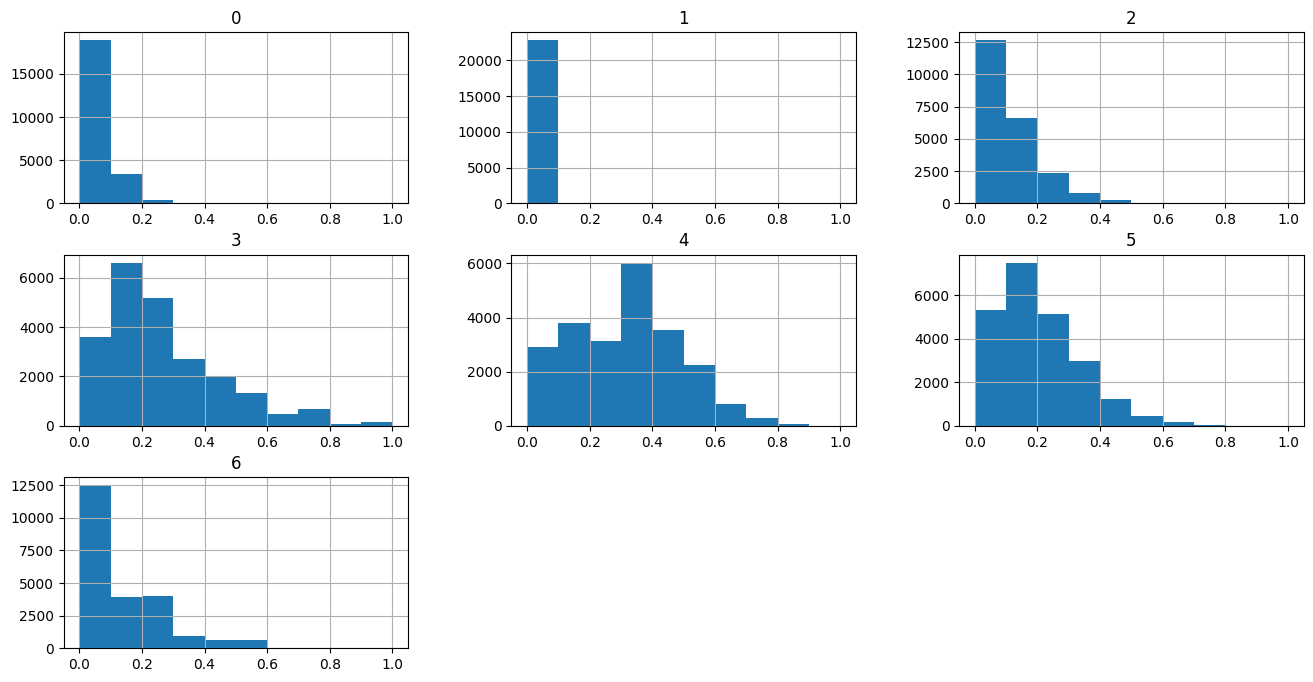

---
<font color=green>Q26:</font>
<br><font color='green'>
Merge `df_train_features_rest` and the scaled numerical features dataframe `df_train_features_numvars_std` to form the complete dataframe `df_train_features_processed`.

</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1VgznTzwgu32QTb6bjxdDzvu8gF5PyEvt"></center>

In [102]:
df_train_features_processed = pd.concat([df_train_features_rest, df_train_features_numvars_std], axis=1)

---
<font color=green>Q27:</font>
<br><font color='green'>
Show the first 5 rows of the new dataset
</font>

---

In [100]:
df_train_features_processed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,category_income_B,category_income_C,category_income_D,0,1,2,3,4,5,6
0,False,False,True,False,False,True,False,False,False,False,...,False,False,True,-0.584502,-0.543430,-0.445235,-0.678046,1.383799,0.094411,-0.692261
1,False,True,False,False,False,False,True,False,True,False,...,False,False,False,0.199772,1.120274,2.308230,2.298383,0.155732,0.000886,0.537292
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,1.454610,0.295850,2.057915,-0.489565,-1.246851,-0.840841,1.766845
3,False,True,False,False,False,True,False,False,False,True,...,False,True,False,-0.741356,-0.172067,0.305710,1.395245,0.698667,1.590813,-0.446350
4,False,True,False,False,False,False,False,True,False,False,...,False,False,True,-0.741356,-0.454303,-0.194920,1.316711,-1.007701,3.087216,-0.938171


---
<font color=green>Q28:</font>
<br><font color='green'>
Print the shapes of `df_train_features_processed`, `df_train_targets`, `df_test_features_processed` and `df_test_targets`
</font>

---

---
<font color=green>Q29:</font>
<br><font color='green'>
Convert the aforementioned dataframes into `numpy` arrays to get `X_train`, `X_test`, `y_train`, `y_test`.
</font>

---

# 4. Fine Tuning a Supervised Model

### 4.1 Evaluation Metrics

First, let's review the different evaluation metrics

---



<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1SbB_CEcOCblu1sUwzGAOwn5oQRQGEQxS"></center>

The F1 score is calculated as follows:

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

---
<font color=green>Q30:</font>
<br><font color='green'>
What is the distribution of the target `loan_status` ?
</font>

---

<Axes: >

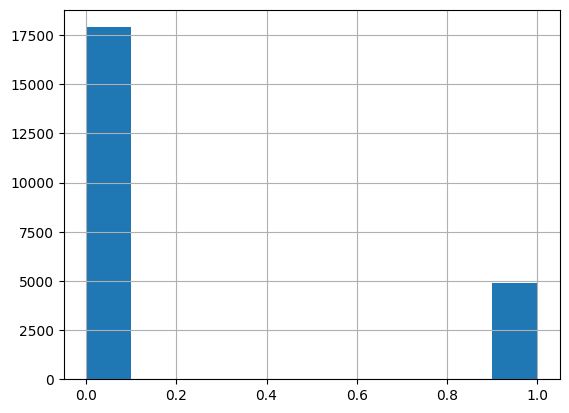

---
<font color=green>Q31:</font>
<br><font color='green'>
Which error is not adapted for the credit problem ?
</font>

---

---

---

A brief review of Cross Validation:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1TQfP49ZaOoAq4Egt0NuIsWYLHb8Maris"></center>

---
<font color=green>Q32:</font>
<br><font color='green'>
Using `cross_val_score` from `sklearn.model_selection`, write a function that takes as inputs the **classifier**, the **training features** and the **training targets**. The function should output the distribution (the mean and the std) of the following performance measures using cross validation (with K=5).

* Precision
* Recall
* f1 score
* auc
* accuracy
</font>

---

In [ ]:
from sklearn.model_selection import cross_val_score


---
<font color=green>Q33:</font>
<br><font color='green'>
Write a function that employs `confusion_matrix` from `sklearn.metrics` that takes`y_test` and `y_hat` (a vector of predicted 0s and 1s) as inputs.
</font>

---

In [ ]:
from sklearn.metrics import confusion_matrix



### 4.2 Fine Tuning Random Forest

Brief review of Hyperparameters Optimization:

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1j93wPCK9TyV0oi_kj-UhijNJTLafH4fa"></center>

We aim to optimize the following hyperparameters:

* n_estimators: Number of trees in the forest.
* max_features: Maximum number of features considered for splitting a node.
* max_depth: Maximum number of levels in each decision tree.
* bootstrap: Sampling method for data points (with or without replacement) during training.

---
<font color=green>Q34:</font>
<br><font color='green'>
Define a dictionary named `random_grid` that associates each hyperparameter with a list of potential values. For instance:

- "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
- "max_features": ["auto", "sqrt"]
- "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
- "bootstrap": [True, False]

</font>

---

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 250, 300, 350, 400]}


---
<font color=green>Q35:</font>
<br><font color='green'>
Employ `RandomizedSearchCV` from `sklearn.model_selection` in conjunction with `RandomForestClassifier` from `sklearn.ensemble` to search for the best combination of hyperparameters among 20 possibilities.


</font>

---

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_iter=3,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         110]},
                   random_state=42, scoring='f1')

---
<font color=green>Q36:</font>
<br><font color='green'>
Print the hyperparameters of the best model `rf_best`?

</font>

---

{'n_estimators': 80,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

---
<font color=green>Q37:</font>
<br><font color='green'>
Using `classification_report` from `sklearn.metrics`, display the different performance measures and the confusion matrix for the "optimal" model `rf_best`.
</font>

---

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7574
           1       0.95      0.74      0.83      2201

    accuracy                           0.93      9775
   macro avg       0.94      0.86      0.89      9775
weighted avg       0.93      0.93      0.93      9775

[[7480   94]
 [ 574 1627]]


# Conclusion:

During this session, we learned about:
1. Loading and visualizing a dataset.
2. Processing categorical and numerical features.
3. Selecting suitable evaluation metrics for imbalanced datasets, particularly recall and AUC.



# Optional Exercise: Resampling techniques

* The main problem when we train a model using an imbalanced dataset is that it results in a biased classifier towards the majority class.

* There are two ways to overcome this bias problem:
  * **Undersampling**: In this case, we randomly select as many observations of the majority class $\mathcal{G}_-$ as we have for the minority class $\mathcal{G}_+$. (See figure below)
  
  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=106_U8l014dk7LybyoPpUEiLlABfeWbhZ"></center>

  * **Oversampling**: In this case, we prefer to have more elements from the minority class $\mathcal{G}_+$. Hence, we either create duplicates of the minority class or create synthetic datapoints so that we reach $|\mathcal{G}_-|$ samples (where $|F|$ denotes the number of elements of $F$). One way of creating synthetic data points is called the **SMOTE** (Synthetic Minority Oversampling Technique). The method is described in [Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) and can be summarized as follows:
    * First, a random example $x_1$ is chosed from the minority class $\mathcal{G}_+$.
    * Then, we find the k nearest neighbors for that example (typically $k=5$).
    * We randomly select one of these k neighbors, let's call it $x_2$.
    * The synthetic instances are generated as a convex combination of the two instances $x_1$ and $x_2$.

  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1j2EGBKoXKdI66mynmgdIYlRT2HWpdhrQ"></center>


---
<font color=green>Optional questions:</font>
<br><font color='green'>
* Finetune the model after using the SMOTE oversampling method.
* Try different supervised models to improve the results.
</font>

---
